In [240]:
import pandas as pd
import numpy as np
import os
import gmaps
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
new_2016 = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name="MYE2 - 2016 All")
new_2016 = new_2016.loc[new_2016["Geography"]=="Region"]

In [60]:
new_2016.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],inplace=True,axis=1)

In [62]:
new_2016.reset_index(drop=True)

,Code,Name,Geography,All ages,18,19,20,21,22,23,...,81,82,83,84,85,86,87,88,89,90
0,E12000001,NORTH EAST,Region,2636589,31077,35265,37336,37230,37051,36381,...,15341,13767,12749,11810,10888,9520,7980,6726,5761,21711
1,E12000002,NORTH WEST,Region,7223961,85546,90520,91602,92269,94977,97206,...,38619,34736,31877,30198,27653,24583,21098,18076,15680,59413
2,E12000003,YORKSHIRE AND THE HUMBER,Region,5425370,65346,74613,77722,75208,77201,77507,...,29532,26903,24391,22620,20856,18480,15970,13647,11906,44971
3,E12000004,EAST MIDLANDS,Region,4725390,56404,64024,65514,65072,65303,62979,...,25403,23091,21412,20339,18529,16468,14328,12331,10892,41626
4,E12000005,WEST MIDLANDS,Region,5810773,71890,75524,75874,76430,79261,79179,...,31299,28169,26333,25059,22912,20618,17611,15110,13086,50643
5,E12000006,EAST,Region,6129005,71220,65279,63370,65471,71367,71868,...,35419,32236,29658,28590,26134,23756,20850,17899,15466,60549
6,E12000007,LONDON,Region,8769659,95228,90921,93508,99290,110739,124641,...,30554,27848,26010,24375,22183,20601,17508,15041,12718,52206
7,E12000008,SOUTH EAST,Region,9030347,108272,107211,105740,106931,110340,109894,...,50125,45854,43082,41124,38473,34338,30501,26149,23133,92950
8,E12000009,SOUTH WEST,Region,5516973,63935,69424,69721,67847,69297,66468,...,34852,31557,30018,28195,26248,23876,20736,18222,15705,63777
9,W92000004,WALES,Region,3113150,37276,40485,41497,41534,43268,42397,...,18509,16996,15797,14204,13011,11673,9990,8676,7684,29601


In [186]:
ages = np.arange(18,91)
avg_ages_df = pd.DataFrame(columns=["Average Age"],index=new_2016["Name"].copy())
for index in range(0,len(new_2016)):
    current_row = new_2016.iloc[index]
    region_name = current_row.values[1]
    age_frequency = current_row.values[4:]
    mean_age = round(ages.dot(age_frequency)/age_frequency.sum())
    avg_ages_df.loc[region_name,"Average Age"]=mean_age
avg_ages_df.reset_index(inplace=True)
avg_ages_df.rename(columns={"Name":"Region"},inplace=True)
avg_ages_df

,Region,Average Age
0,NORTH EAST,49
1,NORTH WEST,49
2,YORKSHIRE AND THE HUMBER,48
3,EAST MIDLANDS,49
4,WEST MIDLANDS,49
5,EAST,50
6,LONDON,44
7,SOUTH EAST,49
8,SOUTH WEST,50
9,WALES,50


In [237]:
avg_ages_df.sort_values(by=["Average Age"],ascending=True,inplace=True)

Text(0, 0.5, 'AGES')

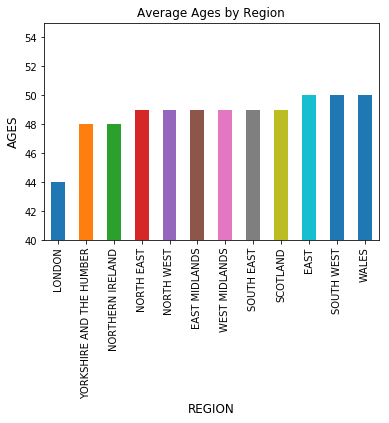

In [241]:
avg_ages_df.plot(x="Region",y="Average Age",kind="bar",legend=False)
plt.ylim(40,55)
plt.title("Average Ages by Region")
plt.xlabel("REGION",size=12)
plt.ylabel("AGES",size=12)

In [196]:
focus_cities_2016 = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name="MYE2 - 2016 All")

# stay_cities_2016 = focus_cities_2016["Cambridge","Oxford","Edinburgh","Lambeth"]

In [197]:
focus_cities_list = ["Boston","North East Lincolnshire","Castle Point","Havering","Cambridge","Oxford","City of Edinburgh","Lambeth"]
# focus_cities_2016["Name"].str.contains("Boston","Havering").value_counts()
focus_cities_df = focus_cities_2016.loc[focus_cities_2016["Name"].isin(focus_cities_list)]
focus_cities_df

,Code,Name,Geography,All ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90
65,E06000012,North East Lincolnshire,Unitary Authority,159828,1868,1971,1959,1960,2090,2014,...,1014,943,813,742,717,606,527,464,387,1458
110,E07000136,Boston,Non-metropolitan District,67709,817,874,853,897,940,862,...,415,361,355,304,321,269,260,204,159,673
176,E07000008,Cambridge,Non-metropolitan District,124635,1402,1381,1366,1324,1483,1429,...,490,457,447,374,398,354,337,287,227,1160
185,E07000069,Castle Point,Non-metropolitan District,89752,871,868,892,955,882,987,...,601,588,570,486,436,397,339,254,215,924
229,E09000022,Lambeth,London Borough,323063,4256,4176,3929,3962,4057,3704,...,766,615,635,606,558,514,416,340,327,1214
246,E09000016,Havering,London Borough,253371,3536,3315,3338,3367,3479,3171,...,1480,1371,1335,1250,1164,1114,957,826,667,2525
306,E07000178,Oxford,Non-metropolitan District,155292,1827,1716,1767,1778,1945,1983,...,510,484,491,486,415,353,353,292,261,1178
400,S12000036,City of Edinburgh,Council Area,507170,5241,5306,5370,5334,5259,5643,...,2329,2152,2036,1902,1866,1516,1375,1173,1076,3923


In [191]:
focus_cities_df.reset_index(inplace=True)

In [198]:
focus_cities_df.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],inplace=True,axis=1)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [199]:
focus_cities_df

,Code,Name,Geography,All ages,18,19,20,21,22,23,...,81,82,83,84,85,86,87,88,89,90
65,E06000012,North East Lincolnshire,Unitary Authority,159828,1841,1678,1612,1579,1820,1882,...,1014,943,813,742,717,606,527,464,387,1458
110,E07000136,Boston,Non-metropolitan District,67709,727,623,654,606,695,749,...,415,361,355,304,321,269,260,204,159,673
176,E07000008,Cambridge,Non-metropolitan District,124635,1786,4105,4354,4201,4015,3531,...,490,457,447,374,398,354,337,287,227,1160
185,E07000069,Castle Point,Non-metropolitan District,89752,1043,912,899,875,1035,1022,...,601,588,570,486,436,397,339,254,215,924
229,E09000022,Lambeth,London Borough,323063,2971,2775,2735,3099,3854,5224,...,766,615,635,606,558,514,416,340,327,1214
246,E09000016,Havering,London Borough,253371,3001,2557,2615,2780,2977,3166,...,1480,1371,1335,1250,1164,1114,957,826,667,2525
306,E07000178,Oxford,Non-metropolitan District,155292,2180,5088,5672,5972,5373,4754,...,510,484,491,486,415,353,353,292,261,1178
400,S12000036,City of Edinburgh,Council Area,507170,5209,7061,8056,8393,9197,9490,...,2329,2152,2036,1902,1866,1516,1375,1173,1076,3923


In [204]:
focus_cities_ages = np.arange(18,91)
focus_cities_avg_ages_df = pd.DataFrame(columns=["Average Age"],index=focus_cities_df["Name"].copy())
for index in range(0,len(focus_cities_df)):
    fc_current_row = focus_cities_df.iloc[index]
    fc_region_name = fc_current_row.values[1]
    fc_age_frequency = fc_current_row.values[4:]
#     print(fc_age_frequency)
    fc_mean_age = round(focus_cities_ages.dot(fc_age_frequency)/fc_age_frequency.sum())
    focus_cities_avg_ages_df.loc[fc_region_name,"Average Age"]=fc_mean_age
focus_cities_avg_ages_df.reset_index(inplace=True)
focus_cities_avg_ages_df.rename(columns={"Name":"Region"},inplace=True)
focus_cities_avg_ages_df

,Region,Average Age
0,North East Lincolnshire,50
1,Boston,50
2,Cambridge,42
3,Castle Point,52
4,Lambeth,41
5,Havering,49
6,Oxford,41
7,City of Edinburgh,45


In [207]:
focus_cities_avg_ages_df.sort_values(by="Average Age",ascending=True,inplace=True)

In [220]:
focus_cities_avg_ages_df["Vote"] = ["Stay","Stay","Stay","Stay","Leave","Leave","Leave","Leave"]
focus_cities_avg_ages_df

,Region,Average Age,Vote
4,Lambeth,41,Stay
6,Oxford,41,Stay
2,Cambridge,42,Stay
7,City of Edinburgh,45,Stay
5,Havering,49,Leave
0,North East Lincolnshire,50,Leave
1,Boston,50,Leave
3,Castle Point,52,Leave


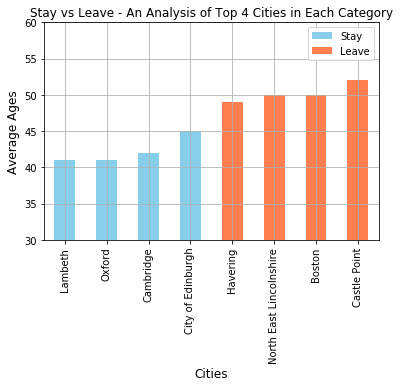

In [242]:
colors={"Leave":"coral","Stay":"skyblue"}
focus_cities_avg_ages_df.plot(x="Region",y="Average Age",kind="bar",color=[colors[i] for i in focus_cities_avg_ages_df["Vote"]])
plt.ylim(30,60)
plt.ylabel("Average Ages",size=12)
plt.xlabel("Cities",size=12)
plt.title("Stay vs Leave - An Analysis of Top 4 Cities in Each Category")
stay = plt.bar(1,1,label="Stay",color="skyblue")
leave = plt.bar(1,1,label="Leave",color="coral")
plt.legend(handles=[stay,leave])
plt.grid()
plt.savefig("../Visualizations/avg_age_by_city_bar_chart.png",bbox_inches="tight")

In [34]:
def age_aggregator(df,list_of_age_ranges):
    """ Function to sum age columns in dataframe
    
    Arguments:
    df -- the pandas dataframe (data from UK dataset)
    list_of_age_ranges -- a list of tuples specifying the age ranges
    """
    new_df = pd.DataFrame()
    new_df.loc[:,"Name"] = df["Name"].copy()
    for tup in list_of_age_ranges:
        col_name = f"{tup[0]} - {tup[1]-1} yrs ('000s)"
        print(f"Calculating total age for {col_name}")
        col_list = list(range(tup[0],tup[1]))
        try:
            df_subset = df[col_list].copy()
            df_subset_sum = df_subset.sum(axis=1) / 1000
            new_df.loc[:, col_name] = df_subset_sum.values
        except KeyError:
            print(f"One or more of the following columns in the list {col_list} does not exist.")
    return new_df

In [35]:
master_2016_df = pd.DataFrame()
list_of_age_ranges = [(18,35),(35,51),(51,68),(68,91)]

current_df_by_region = new_2016[new_2016["Geography"]=="Region"].copy()
popn_data_summary = age_aggregator(current_df_by_region,list_of_age_ranges)
if master_2016_df.size == 0:
    master_2016_df = popn_data_summary.copy()
else:
    master_2016_df = pd.merge(master_df, popn_data_summary, on="Name")

Calculating total age for 18 - 34 yrs ('000s)
Calculating total age for 35 - 50 yrs ('000s)
Calculating total age for 51 - 67 yrs ('000s)
Calculating total age for 68 - 90 yrs ('000s)


In [37]:
master_2016_df = master_2016_df.rename(columns = {"18 - 34 yrs ('000s)":"18 - 34 yrs","35 - 50 yrs ('000s)":"35 - 50 yrs",
                                    "51 - 67 yrs ('000s)":"51 - 67 yrs","68 - 90 yrs ('000s)":"68 - 90 yrs"})
master_2016_df.reset_index(drop=True)

,Name,18 - 34 yrs,35 - 50 yrs,51 - 67 yrs,68 - 90 yrs
0,NORTH EAST,587.944,523.886,583.861,415.255
1,NORTH WEST,1614.025,1487.203,1504.187,1085.106
2,YORKSHIRE AND THE HUMBER,1234.621,1109.563,1115.778,813.008
3,EAST MIDLANDS,1029.699,979.901,1000.962,734.167
4,WEST MIDLANDS,1307.013,1193.066,1160.317,878.027
5,EAST,1251.818,1311.504,1269.374,982.539
6,LONDON,2436.553,2097.094,1421.217,833.018
7,SOUTH EAST,1856.056,1955.101,1865.227,1419.625
8,SOUTH WEST,1125.136,1105.821,1207.545,987.573
9,WALES,672.534,613.211,678.267,521.232


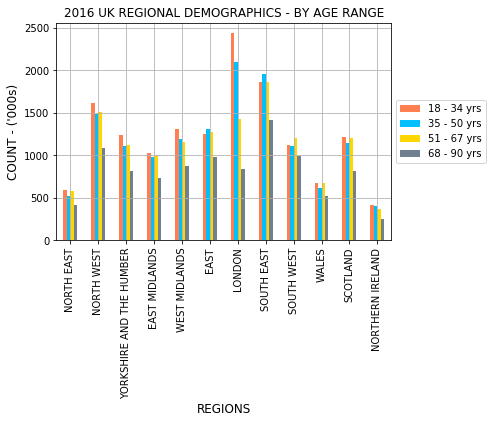

In [41]:
chart = master_2016_df.plot(x="Name",y=["18 - 34 yrs","35 - 50 yrs", 
                         "51 - 67 yrs", "68 - 90 yrs"],kind="bar",align="center",
                     color=["coral","deepskyblue","gold","slategrey"])
chart.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT - ('000s)",size=12)
plt.title("2016 UK REGIONAL DEMOGRAPHICS - BY AGE RANGE")
plt.grid()
plt.savefig("../Visualizations/age_range_bar_chart.png",bbox_inches="tight")

In [6]:
gender_sheets_2016 = ["MYE2 - 2016 M", "MYE2 - 2016 F"]
gender_master = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name=gender_sheets_2016)

In [7]:
def gender_by_age_aggregator(df,list_of_age_ranges,sheet_name=""):
    """ Function to sum age columns in dataframe
    
    Arguments:
    df -- the pandas dataframe (data from UK dataset)
    list_of_age_ranges -- a list of tuples specifying the age ranges
    """
    new_gender_df = pd.DataFrame()
    new_gender_df.loc[:, "Name"] = df["Name"].copy()
    for tup in list_of_age_ranges:
        prefix = sheet_name[12:13]
        col_name = f"{prefix}: {tup[0]} - {tup[1]-1} yrs ('000s)"
        print(f"Calculating total age for {col_name}")
        col_list = list(range(tup[0],tup[1]))
        try:
            gender_df_subset = df[col_list].copy()
            gender_df_subset_sum = gender_df_subset.sum(axis=1) / 1000
            new_gender_df.loc[:, col_name] = gender_df_subset_sum.values
        except KeyError:
            print(f"One or more of the following columns in the list {col_list} does not exist.")
    return new_gender_df

In [8]:
gender_master_df = pd.DataFrame()
list_of_age_ranges = [(18,35),(35,51),(51,68),(68,91)]

for sheet in gender_sheets_2016:
    current_gender_df = gender_master[sheet]
    current_gender_df_by_region = current_gender_df[current_gender_df["Geography"]=="Region"].copy()
    gender_popn_data_summary = gender_by_age_aggregator(current_gender_df_by_region,list_of_age_ranges,sheet)
    if gender_master_df.size == 0:
        gender_master_df = gender_popn_data_summary.copy()
    else:
        gender_master_df = pd.merge(gender_master_df, gender_popn_data_summary, on="Name")

Calculating total age for M: 18 - 34 yrs ('000s)
Calculating total age for M: 35 - 50 yrs ('000s)
Calculating total age for M: 51 - 67 yrs ('000s)
Calculating total age for M: 68 - 90 yrs ('000s)
Calculating total age for F: 18 - 34 yrs ('000s)
Calculating total age for F: 35 - 50 yrs ('000s)
Calculating total age for F: 51 - 67 yrs ('000s)
Calculating total age for F: 68 - 90 yrs ('000s)


In [9]:
gender_master_df
gender_master_df = gender_master_df.rename(columns = {"M: 18 - 34 yrs ('000s)":"M: 18 - 34 yrs",
                                                      "M: 35 - 50 yrs ('000s)":"M: 35 - 50 yrs",
       "M: 51 - 67 yrs ('000s)":"M: 51 - 67 yrs", "M: 68 - 90 yrs ('000s)":"M: 68 - 90 yrs",
       "F: 18 - 34 yrs ('000s)":"F: 18 - 34 yrs", "F: 35 - 50 yrs ('000s)":"F: 35 - 50 yrs",
       "F: 51 - 67 yrs ('000s)":"F: 51 - 67 yrs", "F: 68 - 90 yrs ('000s)":"F: 68 - 90 yrs"})
gender_master_df

,Name,M: 18 - 34 yrs,M: 35 - 50 yrs,M: 51 - 67 yrs,M: 68 - 90 yrs,F: 18 - 34 yrs,F: 35 - 50 yrs,F: 51 - 67 yrs,F: 68 - 90 yrs
0,NORTH EAST,297.359,255.858,285.071,185.516,290.585,268.028,298.790,229.739
1,NORTH WEST,815.021,734.257,742.009,485.655,799.004,752.946,762.178,599.451
2,YORKSHIRE AND THE HUMBER,623.653,551.819,552.093,361.314,610.968,557.744,563.685,451.694
3,EAST MIDLANDS,521.448,484.045,495.058,333.574,508.251,495.856,505.904,400.593
4,WEST MIDLANDS,664.962,592.561,573.306,394.571,642.051,600.505,587.011,483.456
5,EAST,633.367,647.485,623.642,443.493,618.451,664.019,645.732,539.046
6,LONDON,1230.502,1064.653,693.010,366.305,1206.051,1032.441,728.207,466.713
7,SOUTH EAST,940.967,962.825,918.779,634.019,915.089,992.276,946.448,785.606
8,SOUTH WEST,574.656,544.882,589.159,445.215,550.480,560.939,618.386,542.358
9,WALES,343.865,301.309,331.549,235.272,328.669,311.902,346.718,285.960


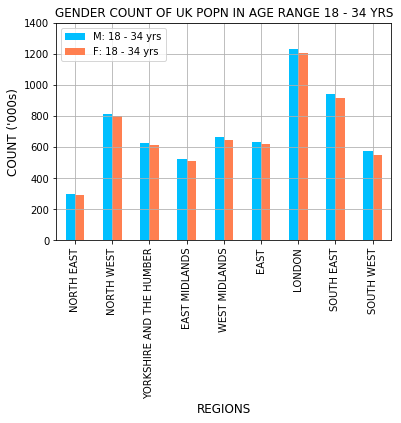

In [223]:
gender_18_to_34 = gender_master_df.plot(x="Name",y=["M: 18 - 34 yrs","F: 18 - 34 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("GENDER COUNT OF UK POPN IN AGE RANGE 18 - 34 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.grid()
plt.savefig("../Visualizations/18_to_34_gender_bar_chart.png",bbox_inches="tight")

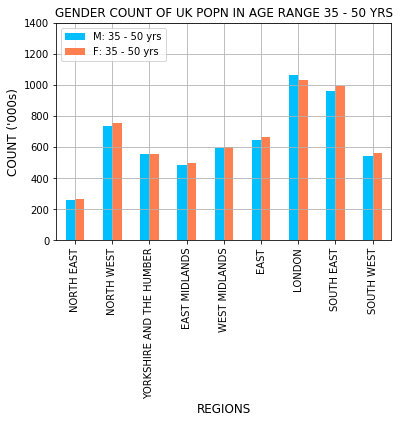

In [224]:
gender_35_to_50 = gender_master_df.plot(x="Name",y=["M: 35 - 50 yrs","F: 35 - 50 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("GENDER COUNT OF UK POPN IN AGE RANGE 35 - 50 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.grid()
plt.legend(loc="upper left")
plt.savefig("../Visualizations/35_to_50_gender_bar_chart.png",bbox_inches="tight")

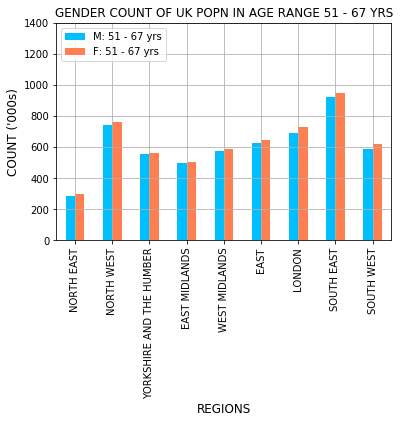

In [225]:
gender_51_to_67 = gender_master_df.plot(x="Name",y=["M: 51 - 67 yrs","F: 51 - 67 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("GENDER COUNT OF UK POPN IN AGE RANGE 51 - 67 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.legend(loc="upper left")
plt.grid()
plt.savefig("../Visualizations/51_to_67_gender_bar_chart.png",bbox_inches="tight")

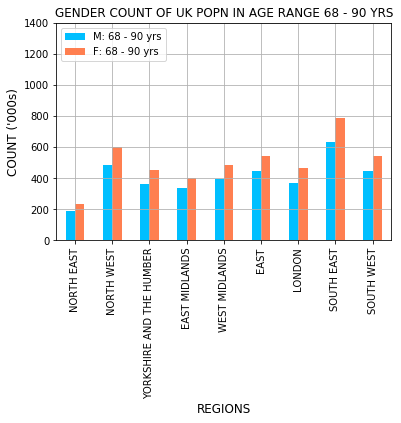

In [226]:
gender_68_to_90 = gender_master_df.plot(x="Name",y=["M: 68 - 90 yrs","F: 68 - 90 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("GENDER COUNT OF UK POPN IN AGE RANGE 68 - 90 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.legend(loc="upper left")
plt.grid()
plt.savefig("../Visualizations/68_to_90_gender_bar_chart.png",bbox_inches="tight")

In [248]:
data_2016_m = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name="MYE2 - 2016 M")
data_2016_m[data_2016_m["Geography"].str.match("Region")]
del data_2016_m["All ages"]
data_2016_m.set_index("Name",inplace=True)
data_2016_m

,Code,Geography,0,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
Name,,,,,,,,,,,,,,,,,,,,,
UNITED KINGDOM,K02000001,Country,401630,402554,406751,416855,430088,424001,415558,411238,...,152996,136457,124118,114574,102258,88486,74887,62141,52736,171710
GREAT BRITAIN,K03000001,Country,388894,390008,394112,404068,416773,410898,402570,397985,...,149346,133189,121139,111952,99908,86565,73180,60758,51541,168144
ENGLAND AND WALES,K04000001,Country,360197,360991,364735,374340,386065,379365,372624,367332,...,136877,122069,111164,102861,92014,79992,67545,56304,47810,156127
ENGLAND,E92000001,Country,343198,343673,347041,356302,367425,360249,353822,348708,...,128606,114734,104443,96913,86706,75366,63742,53095,45106,147381
NORTH EAST,E12000001,Region,14804,14874,15244,15616,16088,16119,15893,15547,...,6685,5908,5340,4888,4312,3680,3012,2470,2056,6449
County Durham,E06000047,Unitary Authority,2770,2719,2917,3036,3007,3103,3028,2929,...,1331,1215,1051,922,857,709,621,494,383,1307
Darlington,E06000005,Unitary Authority,619,631,671,681,680,645,699,685,...,274,258,232,197,167,142,130,102,103,318
Hartlepool,E06000001,Unitary Authority,576,512,562,579,604,625,584,596,...,242,207,205,175,128,139,108,81,70,210
Middlesbrough,E06000002,Unitary Authority,987,1006,1049,1029,1016,993,1007,868,...,316,265,258,211,230,175,146,99,84,238


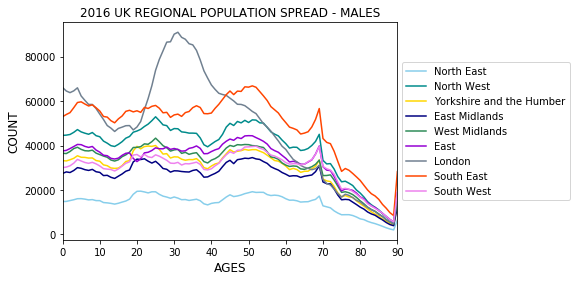

In [253]:
plt.plot(range(0,91),data_2016_m.loc["NORTH EAST"][2:],color="skyblue",label="North East")
plt.plot(range(0,91),data_2016_m.loc["NORTH WEST"][2:],color="darkcyan",label="North West")
plt.plot(range(0,91),data_2016_m.loc["YORKSHIRE AND THE HUMBER"][2:],color="gold",label="Yorkshire and the Humber")
plt.plot(range(0,91),data_2016_m.loc["EAST MIDLANDS"][2:],color="navy",label="East Midlands")
plt.plot(range(0,91),data_2016_m.loc["WEST MIDLANDS"][2:],color="seagreen",label="West Midlands")
plt.plot(range(0,91),data_2016_m.loc["EAST"][2:],color="darkviolet",label="East")
plt.plot(range(0,91),data_2016_m.loc["LONDON"][2:],color="slategrey",label="London")
plt.plot(range(0,91),data_2016_m.loc["SOUTH EAST"][2:],color="orangered",label="South East")
plt.plot(range(0,91),data_2016_m.loc["SOUTH WEST"][2:],color="violet",label="South West")
plt.xlim((0,90))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("AGES",size=12)
plt.ylabel("COUNT",size=12)
plt.title("2016 UK REGIONAL POPULATION SPREAD - MALES")
plt.savefig("../Visualizations/popn_by_region_line_chart_males.png",bbox_inches="tight")

In [249]:
data_2016_f = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name="MYE2 - 2016 F")
data_2016_f = data_2016_f[data_2016_f["Geography"].str.match("Region")]
del data_2016_f["All ages"]
data_2016_f.set_index("Name",inplace=True)
data_2016_f

,Code,Geography,0,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
Name,,,,,,,,,,,,,,,,,,,,,
NORTH EAST,E12000001,Region,13841,13749,14207,14676,15282,15338,15151,14586,...,8656,7859,7409,6922,6576,5840,4968,4256,3705,15262
NORTH WEST,E12000002,Region,42242,42159,43099,43372,45057,44673,43422,43028,...,21749,19999,18524,17991,16583,15160,13224,11449,10188,41899
YORKSHIRE AND THE HUMBER,E12000003,Region,31250,31765,31921,32821,33975,32958,33267,32887,...,16796,15443,14196,13434,12632,11588,9974,8688,7709,31665
EAST MIDLANDS,E12000004,Region,26471,26240,26814,27851,28843,28495,27866,27582,...,13991,12973,12167,11699,10980,9904,8946,7871,6936,29192
WEST MIDLANDS,E12000005,Region,34532,34542,35353,36244,37052,36641,35371,35787,...,17499,15863,15091,14607,13674,12580,10936,9461,8287,35869
EAST,E12000006,Region,35894,35953,36624,37665,38858,38274,37983,37444,...,19403,17982,16830,16433,15404,14225,12699,11152,9840,41798
LONDON,E12000007,Region,62752,61482,60425,61773,63119,59081,57293,56281,...,17258,15715,14901,14059,13174,12448,10793,9361,7961,35672
SOUTH EAST,E12000008,Region,50326,51505,52232,53647,56654,56498,56093,54719,...,27982,25857,24756,23791,22685,20810,18687,16341,14621,64664
SOUTH WEST,E12000009,Region,28597,28749,29753,30410,31631,31548,31238,30456,...,19204,17736,17213,16461,15462,14319,12613,11527,9994,44444


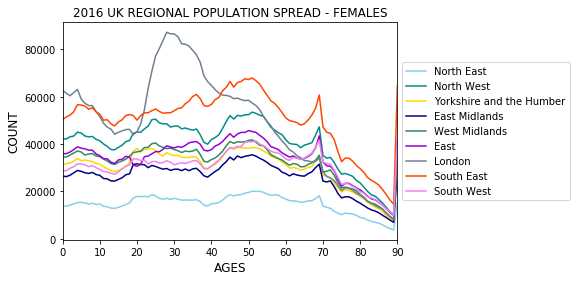

In [254]:
plt.plot(range(0,91),data_2016_f.loc["NORTH EAST"][2:],color="skyblue",label="North East")
plt.plot(range(0,91),data_2016_f.loc["NORTH WEST"][2:],color="darkcyan",label="North West")
plt.plot(range(0,91),data_2016_f.loc["YORKSHIRE AND THE HUMBER"][2:],color="gold",label="Yorkshire and the Humber")
plt.plot(range(0,91),data_2016_f.loc["EAST MIDLANDS"][2:],color="navy",label="East Midlands")
plt.plot(range(0,91),data_2016_f.loc["WEST MIDLANDS"][2:],color="seagreen",label="West Midlands")
plt.plot(range(0,91),data_2016_f.loc["EAST"][2:],color="darkviolet",label="East")
plt.plot(range(0,91),data_2016_f.loc["LONDON"][2:],color="slategrey",label="London")
plt.plot(range(0,91),data_2016_f.loc["SOUTH EAST"][2:],color="orangered",label="South East")
plt.plot(range(0,91),data_2016_f.loc["SOUTH WEST"][2:],color="violet",label="South West")
plt.xlim((0,90))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("AGES",size=12)
plt.ylabel("COUNT",size=12)
plt.title("2016 UK REGIONAL POPULATION SPREAD - FEMALES")
plt.savefig("../Visualizations/popn_by_region_line_chart_females.png",bbox_inches="tight")